In [1]:
import pandas as pd

Q1  A.	Create 2 dataframes out of this dataframe – 1 with all numerical variables and other with all categorical variables.

In [4]:
# Load the dataset
df = pd.read_excel("C:/Users/praga/Downloads/Worksheet in Assignment (4) (2).xlsm")

# Separate numerical and categorical variables
df_numeric = df.select_dtypes(include=['number'])
df_categorical = df.select_dtypes(include=['object'])

# Display first few rows of each DataFrame
print("Numerical Variables:\n", df_numeric.head())
print("\nCategorical Variables:\n", df_categorical.head())

Numerical Variables:
    carat  depth  table  weight  size  price
0   0.23   61.5   55.0    3.95  3.98    326
1   0.21   59.8   61.0    3.89  3.84    326
2   0.23   56.9   65.0    4.05  4.07    327
3   0.29   62.4   58.0    4.20  4.23    334
4   0.31   63.3   58.0    4.34  4.35    335

Categorical Variables:
        cut color clarity
0    Ideal     E     SI2
1  Premium     E     SI1
2     Good     E     VS1
3  Premium     I     VS2
4     Good     J     SI2


Q1 B.	Calculate the measure of central tendency of numerical variables using Pandas and statistics libraries and check if the calculated values are different between these 2 libraries.


In [7]:
import statistics

# Using Pandas
mean_pandas = df_numeric.mean()
median_pandas = df_numeric.median()
mode_pandas = df_numeric.mode().iloc[0]

# Using statistics module
mean_stats = {col: statistics.mean(df_numeric[col]) for col in df_numeric.columns}
median_stats = {col: statistics.median(df_numeric[col]) for col in df_numeric.columns}
mode_stats = {col: statistics.mode(df_numeric[col]) for col in df_numeric.columns}

print("Pandas Mean:\n", mean_pandas)
print("Statistics Mean:\n", mean_stats)

# Compare if the values differ
diff = mean_pandas - pd.Series(mean_stats)
print("\nDifference in Mean:\n", diff)

Pandas Mean:
 carat        0.797940
depth       61.749405
table       57.457184
weight       5.731157
size         5.734526
price     3932.799722
dtype: float64
Statistics Mean:
 {'carat': 0.7979397478680015, 'depth': 61.74940489432703, 'table': 57.45718390804598, 'weight': 5.731157211716722, 'size': 5.734525954764553, 'price': 3932.799721913237}

Difference in Mean:
 carat    -1.110223e-16
depth     7.105427e-15
table     0.000000e+00
weight    0.000000e+00
size      0.000000e+00
price     0.000000e+00
dtype: float64


Q1 C. Check the skewness of all numeric variables. Mention against each variable if its highly skewed/light skewed/ Moderately skwewed.

In [19]:
# C.Check the skewness of all numeric variables. Mention against each variable if its highly skewed/light skewed/ Moderately skwewed.
skewness = df_numeric.skew()

# Categorizing skewness levels
def skew_category(value):
    if abs(value) > 1:
        return "Highly Skewed"
    elif 0.5 < abs(value) <= 1:
        return "Moderately Skewed"
    else:
        return "Lightly Skewed"

skewness_category = skewness.apply(skew_category)
print("Skewness Levels:\n", skewness_category)

Skewness Levels:
 carat         Highly Skewed
depth        Lightly Skewed
table     Moderately Skewed
weight       Lightly Skewed
size          Highly Skewed
price         Highly Skewed
dtype: object


Q1 D. Use the different transformation techniques to convert skewed data found in previous question into normal distribution.

In [22]:
import numpy as np

# Applying log transformation
df_numeric_transformed = df_numeric.copy()
for col in df_numeric.columns:
    if df_numeric[col].skew() > 1:
        df_numeric_transformed[col] = np.log1p(df_numeric[col])

print(df_numeric_transformed.skew())  # Check if skewness is reduced

carat     0.580654
depth    -0.082294
table     0.796896
weight    0.378676
size      0.006600
price     0.115926
dtype: float64


Q1 E. Create a user defined function in python to check the outliers using IQR method. Then pass all numeric variables in that function to check outliers.

In [25]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data < lower_bound) | (data > upper_bound)).sum()

outliers = df_numeric.apply(detect_outliers_iqr)
print("Outliers count:\n", outliers)

Outliers count:
 carat     1889
depth     2545
table      605
weight      32
size        29
price     3540
dtype: int64


Q1 F. Convert categorical variables into numerical variables using LabelEncoder technique.


In [28]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
df_encoded = df_categorical.copy()

for col in df_categorical.columns:
    label_encoders[col] = LabelEncoder()
    df_encoded[col] = label_encoders[col].fit_transform(df_categorical[col])

print(df_encoded.head())

   cut  color  clarity
0    2      1        3
1    3      1        2
2    1      1        4
3    3      5        5
4    1      6        3


Q1 G. Use both the feature scaling techniques (standardscaler/min max scaler) on all the variables.

In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization
scaler_standard = StandardScaler()
df_standardized = pd.DataFrame(scaler_standard.fit_transform(df_numeric), columns=df_numeric.columns)

# Normalization
scaler_minmax = MinMaxScaler()
df_normalized = pd.DataFrame(scaler_minmax.fit_transform(df_numeric), columns=df_numeric.columns)

print("Standardized Data:\n", df_standardized.head())
print("\nNormalized Data:\n", df_normalized.head())

Standardized Data:
       carat     depth     table    weight      size     price
0 -1.198168 -0.174092 -1.099672 -1.587837 -1.536196 -0.904095
1 -1.240361 -1.360738  1.585529 -1.641325 -1.658774 -0.904095
2 -1.198168 -3.385019  3.375663 -1.498691 -1.457395 -0.903844
3 -1.071587  0.454133  0.242928 -1.364971 -1.317305 -0.902090
4 -1.029394  1.082358  0.242928 -1.240167 -1.212238 -0.901839

Normalized Data:
       carat     depth     table    weight      size     price
0  0.006237  0.513889  0.230769  0.367784  0.067572  0.000000
1  0.002079  0.466667  0.346154  0.362197  0.065195  0.000000
2  0.006237  0.386111  0.423077  0.377095  0.069100  0.000054
3  0.018711  0.538889  0.288462  0.391061  0.071817  0.000433
4  0.022869  0.563889  0.288462  0.404097  0.073854  0.000487


Q1 H. Create the Histogram for all numeric variables and draw the KDE plot on that.

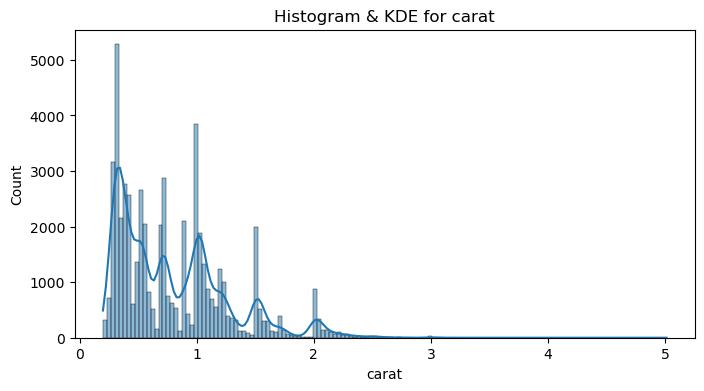

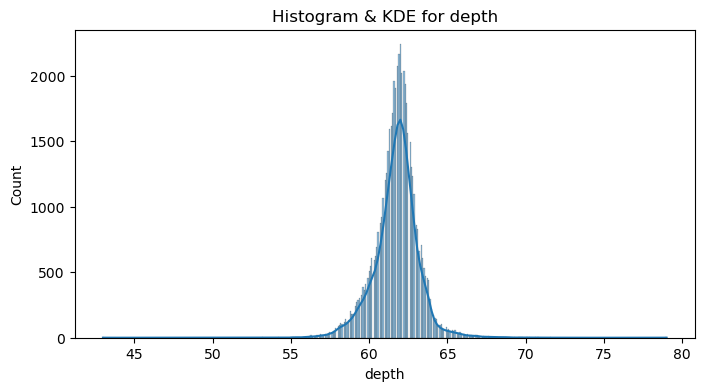

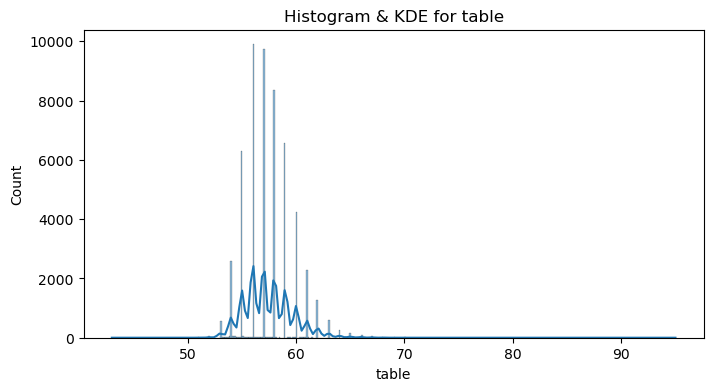

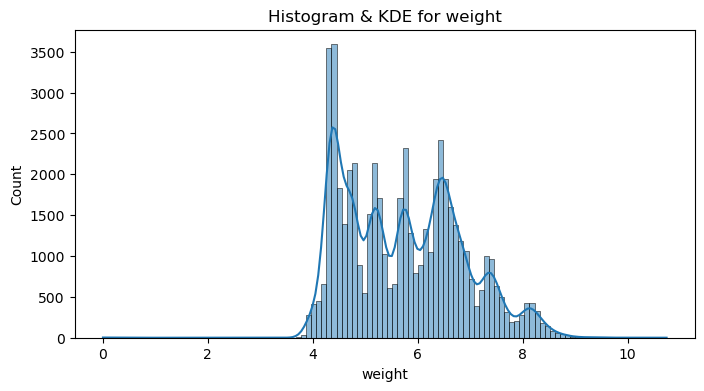

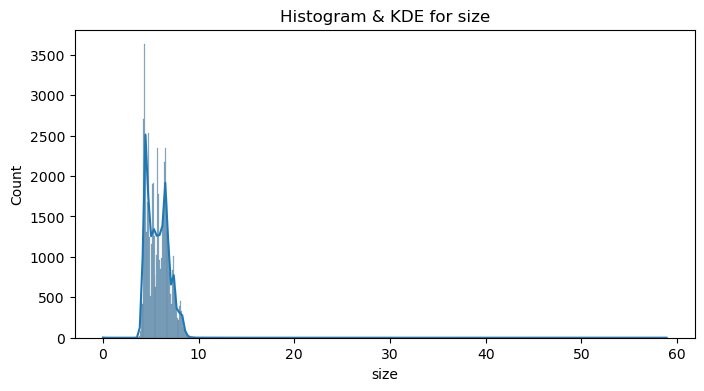

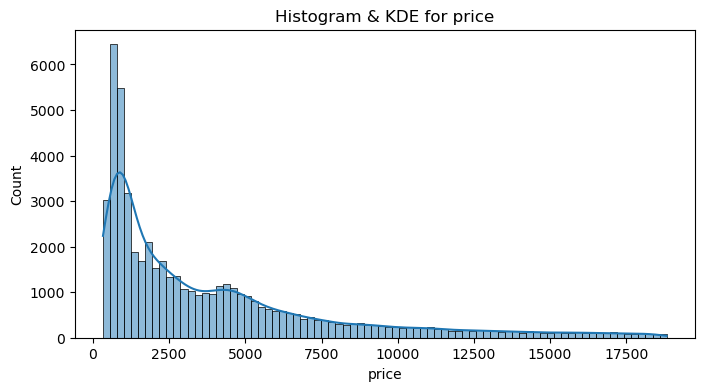

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram with KDE
for col in df_numeric.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_numeric[col], kde=True)
    plt.title(f"Histogram & KDE for {col}")
    plt.show()

Q1 I. Check the correlation between all the numeric variables using HeatMap and try to draw some conclusion about the data.

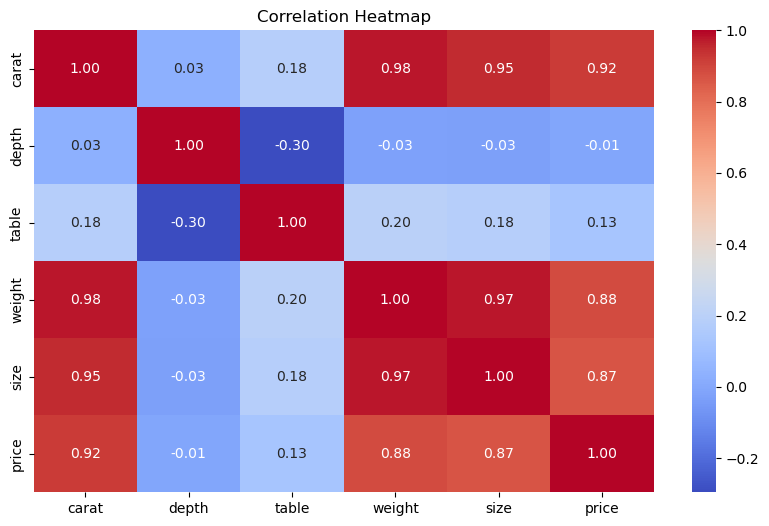

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Q2: Gradient Descent and Learning Rate Impact

Gradient Descent Explanation
Gradient Descent is an optimization algorithm used to minimize the loss function in machine learning models by iteratively adjusting model parameters. The process follows these steps:

1.Initialize Parameters: Start with random weights.

2.Compute the Gradient: Calculate the derivative of the loss function.

3.Update Weights: Adjust weights using the formula:

θ=θ−α*∂J/∂θ
where:

θ = parameter (weight)
α = learning rate
J = loss function

4.Repeat Until Convergence: Continue updating until the loss stops decreasing.

Impact of Learning Rate

The learning rate (α) plays a crucial role in convergence:

Too Small: Converges very slowly.

Too Large: May overshoot or fail to converge.

Optimal: Finds the minimum efficiently.

